In [1]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from tqdm import tqdm

<class 'dict'> dict_keys(['__header__', '__version__', '__globals__', 'Y'])
(100, 100)


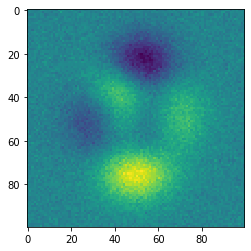

In [2]:
data = io.loadmat('./Peaks.mat')
print(type(data), data.keys())

Y = data['Y']
print(Y.shape)
plt.imshow(Y)

In [3]:
#x = np.arange(100)
x = np.arange(0.01,1.001,0.01)
x = x.reshape(x.shape[0], 1)
print(x.shape)

(100, 1)


In [4]:
#x = np.arange(100)
x = np.arange(0.01,1.001,0.01)
x = x.reshape(x.shape[0], 1)
kernel_1d = np.exp(-cdist(x,x)**2)

K = np.kron(kernel_1d, kernel_1d)
Y_flat = np.ravel(Y)

print(kernel_1d.shape, K.shape, Y_flat.shape)

(100, 100) (10000, 10000) (10000,)


In [5]:
# compute alpha

#lams = [.01, .025, .05, .075, .1]
lams = np.logspace(-14, -10, num=5)
#lams = [1e-10]
alphas = []

for lam in tqdm(lams):
    a = np.linalg.inv(K + lam*np.eye(K.shape[0])) @ Y_flat
    alphas.append(a)

print(alphas[0].shape)

100%|██████████| 5/5 [04:59<00:00, 59.90s/it]

(10000,)


[53.71030819603176, 0.6657943318150384, 0.6050116016230328, 0.6500138182782441, 0.7058554493427454]


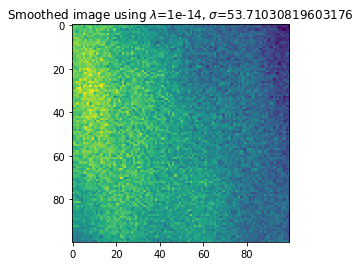

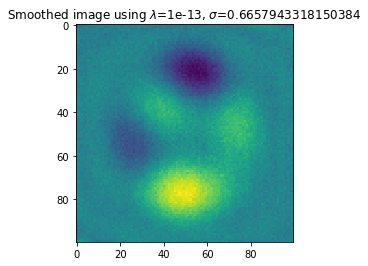

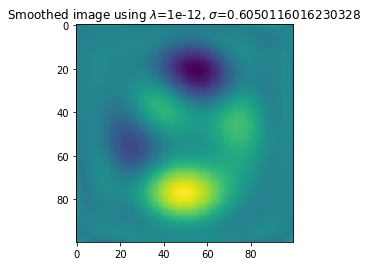

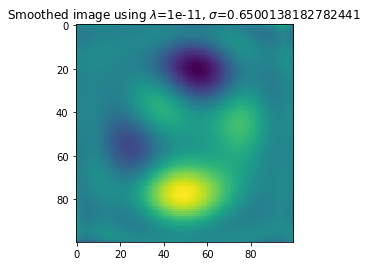

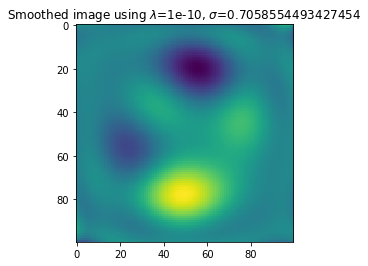

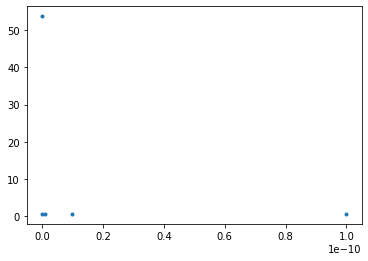

In [7]:
sigmas = []
for i, a in enumerate(alphas):
    a = a.reshape(a.shape[0], 1)
    #print(a.shape, K.shape)

    f = a.T@K
    f = f.reshape((100,100))
    
    sigmas.append((Y - f).std())
    
    plt.figure()
    plt.imshow(f)
    plt.title(f'Smoothed image using $\lambda$={lams[i]}, $\sigma$={sigmas[i]}')
    
plt.figure()
plt.plot(np.logspace(-14, -10, num=5), sigmas, '.')
print(sigmas)

Text(0.5, 1.0, 'Smoothed image using $\\lambda$=1e-12, $\\sigma$=0.6050116016230328')

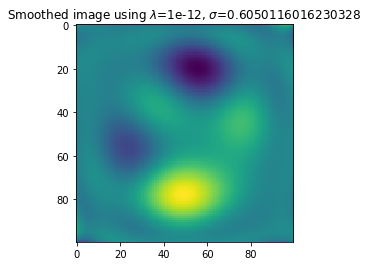

In [8]:
plt.figure()
plt.imshow(f)
plt.title(f'Smoothed image using $\lambda$={lams[2]}, $\sigma$={sigmas[2]}')